In [1]:
import pandas as pd

In [2]:
# распределние длинна в словах документа
# доля релевантных слов относительно всего датасета

In [3]:
bench = pd.read_pickle('bench-df.pkl')
cuad = pd.read_pickle('cuad-df.pkl')

In [5]:
docs_bench = list(set(bench.doc))
docs_cuad = list(set(cuad.doc))

In [6]:
import re

word_count_arr_bench = []
word_count_arr_cuad = []

def count_words_and_sentences(file_path, dir):
    full_path = f'{dir}/{file_path}'
    try:
        with open(full_path, 'r') as file:
            text = file.read()
            
            # Count words (split by whitespace and filter out empty strings)
            words = [word for word in re.split(r'\s+', text) if word]
            word_count = len(words)

            word_count = text.count(' ')
            
            
            return word_count
            
    except FileNotFoundError:
        print(f"Error: File '{full_path}' not found.")
        return None, None
    except Exception as e:
        print(f"Error processing file '{full_path}': {str(e)}")
        return None, None

for doc in docs_bench:
    words = count_words_and_sentences(doc, dir='data_txt_restored')
    word_count_arr_bench.append([doc, words])

for doc in docs_cuad:
    words = count_words_and_sentences(doc, dir='cuad_restored')
    word_count_arr_cuad.append([doc, words])

In [7]:
word_count_arr_bench = sorted(word_count_arr_bench, key=lambda x: x[1])
word_count_arr_cuad = sorted(word_count_arr_cuad, key=lambda x: x[1])

In [8]:
bench['rel_sent_len'] = bench.rel_sent.apply(lambda x: x.count(' ') / sum([i[1] for i in word_count_arr_bench]))
cuad['rel_sent_len'] = cuad.rel_sent.apply(lambda x: x.count(' ') / sum([i[1] for i in word_count_arr_cuad]))

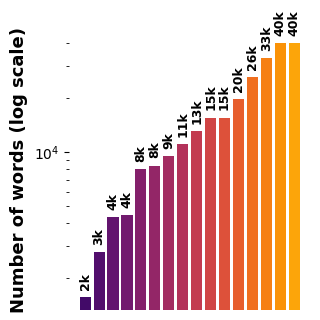

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set font to Times New Roman and make text bold
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['font.weight'] = 'bold'

# Your data
data = word_count_arr_cuad

# Extract values (file names removed)
values = [item[1] for item in data]

# Create figure and axis
cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(8.4*cm, 8.4*cm))  # Wider figure
plt.style.use('default')  # Using default white background style

# Create vertical bar plot with inferno colormap
bars = plt.bar(range(len(values)), values, color=plt.cm.inferno(np.linspace(0.2, 0.8, len(values))))

# Remove x-axis labels (since we're removing file names)
plt.xticks([])

# Add value labels on top of each bar (adjusted for log scale)
for bar in bars:
    height = bar.get_height()
    label_y = height * 1.1  # 10% above the bar
    plt.text(bar.get_x() + bar.get_width()/2, 
             label_y, 
             f'{str(round(height,-3))[:-3]}k', 
             va='bottom', 
             ha='center', 
             color='black', 
             fontsize=9,
             weight='bold',
             rotation=90)  # Bold font for values

# Set y-axis to logarithmic scale
plt.yscale('log')

# Customize the plot with bold text
plt.title('', fontsize=14, pad=16, color='black', weight='bold')
plt.ylabel('Number of words (log scale)', fontsize=13, color='black', weight='bold')
plt.tick_params(axis='both', colors='black')  # Black tick labels

# Set background color to white
plt.gca().set_facecolor('white')

# Make borders visible with black color
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

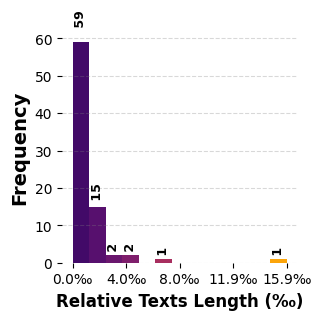

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import pandas as pd

# Set font to Times New Roman and make text bold
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['font.weight'] = 'bold'

# Assuming df is your pandas DataFrame
data = cuad['rel_sent_len'] * 1000  # Convert to промилле (‰)

cm = 1/2.54  # centimeters in inches
plt.figure(figsize=(8.4*cm, 8.4*cm))  # Wider figure
plt.style.use('default')  # Using default white background style

# Create histogram with inferno colormap and NO borders
n, bins, patches = plt.hist(data, bins=13, edgecolor='none', linewidth=0)

# Apply inferno colormap to bars
colors = plt.cm.inferno(np.linspace(0.2, 0.8, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)

# Customize the plot
plt.title('', fontsize=14, pad=20, weight='bold')
plt.xlabel('Relative Texts Length (‰)', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')

# Set background color to white
plt.gca().set_facecolor('white')

# Format x-axis ticks with ‰ symbol
plt.gca().set_xticks(np.linspace(data.min(), data.max(), 5))
plt.gca().set_xticklabels([f'{round(x, 1)}‰' for x in plt.gca().get_xticks()])

# Make plot borders visible (but not bar borders)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.3, color='gray', linestyle='--')

# Add value labels on top of significant bars
for i in range(len(patches)):
    if n[i] > 0.01 * max(n):  # Only label bars >10% of max height
        plt.text(patches[i].get_x() + patches[i].get_width()/2, 
                 n[i] * 1.05, 
                 f' {int(n[i])}', 
                 ha='center', 
                 va='bottom',
                 color='black',
                 weight='bold',
                 fontsize=9,
                 rotation=90)
        
# Make borders visible with black color
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()